In [1]:
import mlrose_hiive as mlrose

# import mlrose
import numpy as np

from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler, OneHotEncoder
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt
import time

In [2]:
fitness = mlrose.FlipFlop()

problem = mlrose.DiscreteOpt(length = 12, fitness_fn = fitness, maximize=True, max_val=2)
schedule = mlrose.ExpDecay()
# init_state = np.array([0, 1, 2, 3, 4, 5, 6, 7])
fitness.evaluate([1,0,1, 0,1,0])

5

In [3]:
itera1 = []
times1 = []
score1 = []
eval1 = []
for i in range(1, 30):

    time1 = time.time()
    best_state, best_fitness, fitness_curve = mlrose.random_hill_climb(problem, 
                                                                       max_attempts = i, 
                                                                       max_iters = 1000,
                                                                       restarts=0, 
#                                                                        init_state = init_state, 
                                                                       curve=True, 
                                                                       random_state = 1)
    time2 = time.time()
    itera1.append(len(fitness_curve))
    times1.append(time2-time1)
    score1.append(best_fitness)
    eval1.append(fitness_curve[-1, 1])
    
time1 = time.time()
best_state, best_fitness, fitness_curve1 = mlrose.random_hill_climb(problem, 
                                                                   max_attempts = 24, 
                                                                   max_iters = 1000,
                                                                   restarts=0, 
#                                                                    init_state = init_state, 
                                                                   curve=True, 
                                                                   random_state = 1)
time2 = time.time()   
print('time: ', round(time2-time1, 3))
print('The best state found is: ', best_state)
print('best_fitness', best_fitness)

time:  0.002
The best state found is:  [0 1 0 0 1 0 1 0 1 0 0 1]
best_fitness 9.0


In [4]:
itera2 = []
times2 = []
score2 = []
eval2 = []
for i in range(1, 30):

    time1 = time.time()
    best_state, best_fitness, fitness_curve = mlrose.simulated_annealing(problem, 
                                                                         schedule = schedule, 
                                                                         max_attempts = i, 
                                                                         max_iters = 1000, 
#                                                                          init_state = init_state, 
                                                                         random_state = 1, 
                                                                         curve = True)
    time2 = time.time()
    
    itera2.append(len(fitness_curve))
    times2.append(time2-time1)
    score2.append(best_fitness)
    eval2.append(fitness_curve[-1, 1])

    
itera2b = []
times2b = []
score2b = []
eval2b = []
for i in range(1,51):
    schedule = mlrose.ExpDecay(i)

    time1 = time.time()
    best_state, best_fitness, fitness_curve = mlrose.simulated_annealing(problem, 
                                                                         schedule = schedule, 
                                                                         max_attempts = 25, 
                                                                         max_iters = 1000, 
#                                                                          init_state = init_state, 
                                                                         random_state = 1, 
                                                                         curve = True)
    time2 = time.time()
    
    itera2b.append(len(fitness_curve))
    times2b.append(time2-time1)
    score2b.append(best_fitness)
    eval2b.append(fitness_curve[-1, 1])  
    
time1 = time.time()
best_state, best_fitness, fitness_curve2 = mlrose.simulated_annealing(problem, 
                                                                     schedule = schedule, 
                                                                     max_attempts = 15, 
                                                                     max_iters = 1000, 
#                                                                      init_state = init_state, 
                                                                     random_state = 1, 
                                                                     curve = True)

time2 = time.time()
print('time: ', round(time2-time1, 3))
print('The best state found is: ', best_state)
print('best_fitness', best_fitness)

time:  0.062
The best state found is:  [1 0 1 0 1 0 1 0 1 0 1 0]
best_fitness 11.0


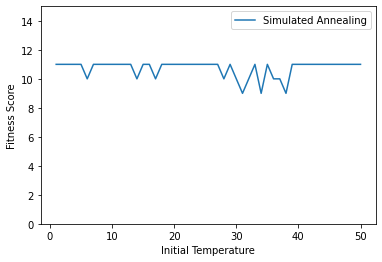

In [5]:
plt.plot(range(1, 51), score2b)
plt.xlabel("Initial Temperature")
plt.ylabel("Fitness Score")
plt.ylim([0, 15])
plt.legend(["Simulated Annealing"])

In [6]:
itera3 = []
times3 = []
score3 = []
eval3 = []
for i in range(1, 30):

    time1 = time.time()
    best_state, best_fitness, fitness_curve = mlrose.genetic_alg(problem, 
                                                                 pop_size = 200, 
                                                                 mutation_prob = 0.1,
                                                                         max_attempts = i, 
                                                                         max_iters = 1000, 
                                                                         random_state = 1, 
                                                                         curve = True)
    time2 = time.time()
    
    itera3.append(len(fitness_curve))
    times3.append(time2-time1)
    score3.append(best_fitness)
    eval3.append(fitness_curve[-1, 1])

    
itera3b = []
times3b = []
score3b = []
eval3b = []
for i in range(10, 210, 10):

    time1 = time.time()
    best_state, best_fitness, fitness_curve = mlrose.genetic_alg(problem, 
                                                                 pop_size = i, 
                                                                 mutation_prob = 0.1,
                                                                         max_attempts = 15, 
                                                                         max_iters = 1000, 
                                                                         random_state = 1, 
                                                                         curve = True)
    time2 = time.time()
    
    itera3b.append(len(fitness_curve))
    times3b.append(time2-time1)
    score3b.append(best_fitness)
    eval3b.append(fitness_curve[-1, 1])
    
    
itera3c = []
times3c = []
score3c = []
for i in range(1, 10, 1):

    time1 = time.time()
    best_state, best_fitness, fitness_curve = mlrose.genetic_alg(problem, 
                                                                 pop_size = 50, 
                                                                 mutation_prob = i/10,
                                                                         max_attempts = 15, 
                                                                         max_iters = 1000, 
                                                                         random_state = 1, 
                                                                         curve = True)
    time2 = time.time()
    
    itera3c.append(len(fitness_curve))
    times3c.append(time2-time1)
    score3c.append(best_fitness)
    
time1 = time.time()
best_state, best_fitness, fitness_curve3 = mlrose.genetic_alg(problem, 
                                                             pop_size = 50, 
                                                             mutation_prob = 0.1,
                                                                     max_attempts = 15, 
                                                                     max_iters = 1000, 
                                                                     random_state = 1, 
                                                                     curve = True)

time2 = time.time()
print('time: ', round(time2-time1, 3))
print('The best state found is: ', best_state)
print('best_fitness', best_fitness)

time:  0.111
The best state found is:  [0 1 0 1 0 1 0 1 0 1 0 1]
best_fitness 11.0


In [7]:
itera4 = []
times4 = []
score4 = []
eval4 = []
for i in range(1, 30):

    time1 = time.time()
    best_state, best_fitness, fitness_curve = mlrose.mimic(problem, 
                                                           pop_size = 200, 
                                                           keep_pct = 0.2,
                                                           max_attempts = i, 
                                                           max_iters = 1000, 
                                                           random_state = 1, 
                                                           curve = True,
                                                           )
    time2 = time.time()
    
    itera4.append(len(fitness_curve))
    times4.append(time2-time1)
    score4.append(best_fitness)
    eval4.append(fitness_curve[-1, 1])

itera4b = []
times4b = []
score4b = []
eval4b = []
for i in range(10, 210, 10):

    time1 = time.time()
    best_state, best_fitness, fitness_curve = mlrose.mimic(problem, 
                                                           pop_size = i, 
                                                           keep_pct = 0.2,
                                                           max_attempts = 2, 
                                                           max_iters = 1000, 
                                                           random_state = 1, 
                                                           curve = True,
                                                           )
    time2 = time.time()
    
    itera4b.append(len(fitness_curve))
    times4b.append(time2-time1)
    score4b.append(best_fitness)
    eval4b.append(fitness_curve[-1, 1])

    
itera4c = []
times4c = []
score4c = []
for i in range(1, 10, 1):

    time1 = time.time()
    best_state, best_fitness, fitness_curve = mlrose.mimic(problem, 
                                                           pop_size = 100, 
                                                           keep_pct = i/10,
                                                           max_attempts = 2, 
                                                           max_iters = 1000, 
                                                           random_state = 1, 
                                                           curve = True,
                                                           )
    time2 = time.time()
    
    itera4c.append(len(fitness_curve))
    times4c.append(time2-time1)
    score4c.append(best_fitness)   
    
time1 = time.time()
best_state, best_fitness, fitness_curve4 = mlrose.mimic(problem, 
                                                       pop_size = 100, 
                                                       keep_pct = 0.1,
                                                       max_attempts = 2, 
                                                       max_iters = 1000, 
                                                       random_state = 1, 
                                                       curve = True,
                                                       )

time2 = time.time()
print('time: ', round(time2-time1, 3))
print('The best state found is: ', best_state)
print('best_fitness', best_fitness)

time:  0.242
The best state found is:  [1 0 1 0 1 0 1 0 1 0 1 0]
best_fitness 11.0


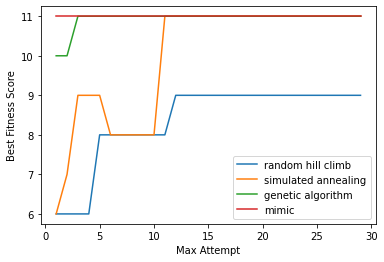

In [8]:
plt.plot(range(1, 30), score1, label='random hill climb')
plt.plot(range(1, 30), score2, label='simulated annealing')
plt.plot(range(1, 30), score3, label='genetic algorithm')
plt.plot(range(1, 30), score4, label='mimic')
plt.ylabel('Best Fitness Score')
plt.xlabel('Max Attempt')
plt.legend()

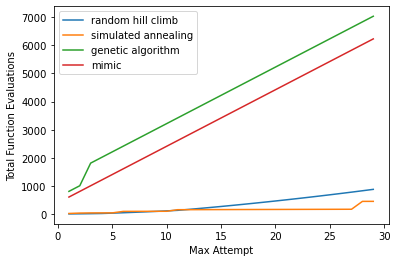

In [9]:
plt.plot(range(1, 30), eval1, label='random hill climb')
plt.plot(range(1, 30), eval2, label='simulated annealing')
plt.plot(range(1, 30), eval3, label='genetic algorithm')
plt.plot(range(1, 30), eval4, label='mimic')
plt.ylabel('Total Function Evaluations')
plt.xlabel('Max Attempt')
plt.legend()

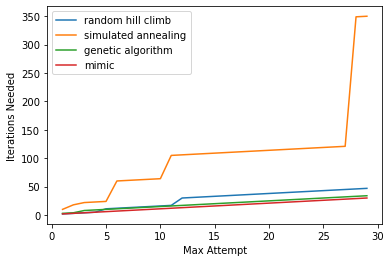

In [10]:
plt.plot(range(1, 30), itera1, label='random hill climb')
plt.plot(range(1, 30), itera2, label='simulated annealing')
plt.plot(range(1, 30), itera3, label='genetic algorithm')
plt.plot(range(1, 30), itera4, label='mimic')
plt.ylabel('Iterations Needed')
plt.xlabel('Max Attempt')
plt.legend()

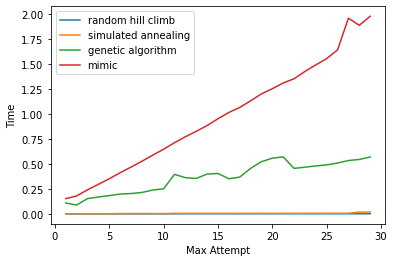

In [11]:
plt.plot(range(1, 30), times1, label='random hill climb')
plt.plot(range(1, 30), times2, label='simulated annealing')
plt.plot(range(1, 30), times3, label='genetic algorithm')
plt.plot(range(1, 30), times4, label='mimic')
plt.ylabel('Time')
plt.xlabel('Max Attempt')
# plt.ylim([0, 1])
plt.legend()

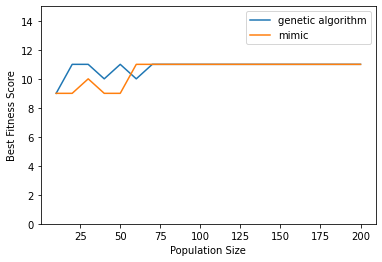

In [12]:
plt.plot(range(10, 210, 10), score3b, label='genetic algorithm')
plt.plot(range(10, 210, 10), score4b, label='mimic')
plt.ylabel('Best Fitness Score')
plt.xlabel('Population Size')
plt.ylim([0,15])
plt.legend()

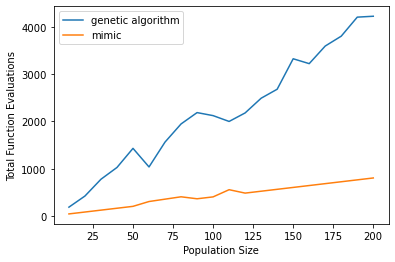

In [13]:
plt.plot(range(10, 210, 10), eval3b, label='genetic algorithm')
plt.plot(range(10, 210, 10), eval4b, label='mimic')
plt.ylabel('Total Function Evaluations')
plt.xlabel('Population Size')
plt.legend()

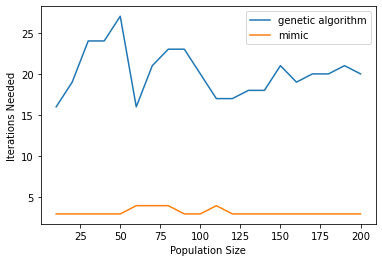

In [14]:
plt.plot(range(10, 210, 10), itera3b, label='genetic algorithm')
plt.plot(range(10, 210, 10), itera4b, label='mimic')
plt.ylabel('Iterations Needed')
plt.xlabel('Population Size')
plt.legend()

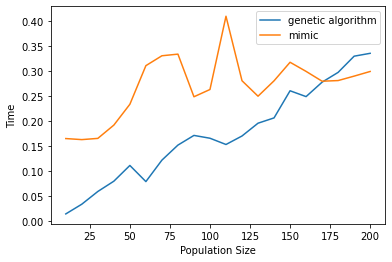

In [15]:
plt.plot(range(10, 210, 10), times3b, label='genetic algorithm')
plt.plot(range(10, 210, 10), times4b, label='mimic')
plt.ylabel('Time')
plt.xlabel('Population Size')
# plt.ylim([0, 1])
plt.legend()

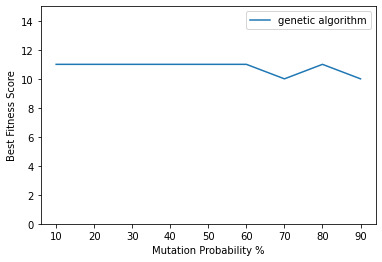

In [16]:
plt.plot(range(10, 100, 10), score3c, label='genetic algorithm')
plt.ylabel('Best Fitness Score')
plt.xlabel('Mutation Probability %')
plt.ylim([0, 15])
plt.legend()

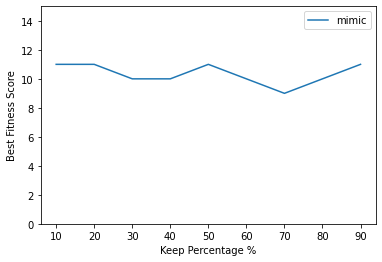

In [17]:
plt.plot(range(10, 100, 10), score4c, label='mimic')
plt.ylabel('Best Fitness Score')
plt.xlabel('Keep Percentage %')
plt.ylim([0, 15])
plt.legend()

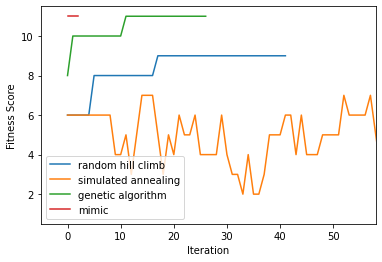

In [18]:
plt.plot(range(len(fitness_curve1)), fitness_curve1[:, 0], label='random hill climb')
plt.plot(range(len(fitness_curve2)), fitness_curve2[:, 0], label='simulated annealing')
plt.plot(range(len(fitness_curve3)), fitness_curve3[:, 0], label='genetic algorithm')
plt.plot(range(len(fitness_curve4)), fitness_curve4[:, 0], label='mimic')
# plt.ylim([15, 30])
plt.xlim([-5, 58])
plt.ylabel('Fitness Score')
plt.xlabel('Iteration')
plt.legend()

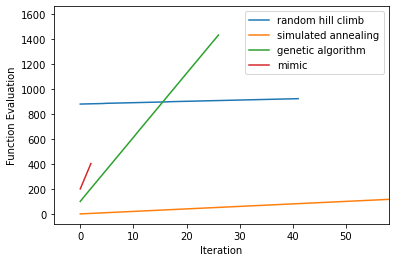

In [19]:
plt.plot(range(len(fitness_curve1)), fitness_curve1[:, 1], label='random hill climb')
plt.plot(range(len(fitness_curve2)), fitness_curve2[:, 1], label='simulated annealing')
plt.plot(range(len(fitness_curve3)), fitness_curve3[:, 1], label='genetic algorithm')
plt.plot(range(len(fitness_curve4)), fitness_curve4[:, 1], label='mimic')
plt.xlim([-5, 58])
plt.ylabel('Function Evaluation')
plt.xlabel('Iteration')
# plt.title('Function Evaluation')
plt.legend()

Text(0.5, 1.0, 'Function Evaluation (per iteration)')

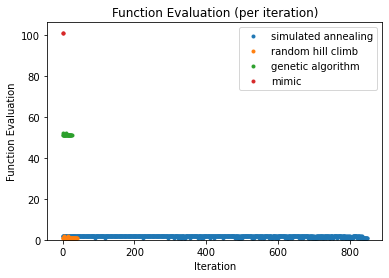

In [20]:
curve1a = fitness_curve1[:-1, 1]
curve1b = fitness_curve1[1:, 1]
curve1 = curve1b - curve1a
curve2a = fitness_curve2[:-1, 1]
curve2b = fitness_curve2[1:, 1]
curve2 = curve2b - curve2a
curve3a = fitness_curve3[:-1, 1]
curve3b = fitness_curve3[1:, 1]
curve3 = curve3b - curve3a
curve4a = fitness_curve4[:-1, 1]
curve4b = fitness_curve4[1:, 1]
curve4 = curve4b - curve4a
plt.plot(range(len(curve2)), curve2, '.', label='simulated annealing')
plt.plot(range(len(curve1)), curve1, '.', label='random hill climb')
plt.plot(range(len(curve3)), curve3, '.', label='genetic algorithm')
plt.plot(range(len(curve4)), curve4, '.', label='mimic')
plt.legend()
plt.ylabel('Function Evaluation')
plt.xlabel('Iteration')
plt.ylim(0)
plt.title('Function Evaluation (per iteration)')
# plt.ylim([0, 3])

## Problem Size ##

In [21]:
itera1 = []
times1 = []
score1 = []
eval1 = []
itera2 = []
times2 = []
score2 = []
eval2 = []
itera3 = []
times3 = []
score3 = []
eval3 = []
itera4 = []
times4 = []
score4 = []
eval4 = []

# fitness = mlrose.CustomFitness(queens_max_pct)
# fitness = mlrose.FourPeaks(t_pct=0.15)
fitness = mlrose.FlipFlop() #s a
# fitness = mlrose.SixPeaks(t_pct=0.15) #mimic?
# fitness = mlrose.ContinuousPeaks(t_pct=0.15)
schedule = mlrose.ExpDecay()

for i in range(4, 24, 2):
    problem = mlrose.DiscreteOpt(length = i, fitness_fn = fitness, maximize=True, max_val=2)

    time1 = time.time()
    best_state, best_fitness, fitness_curve = mlrose.random_hill_climb(problem, 
                                                                       max_attempts = 25, 
                                                                       max_iters = 1000,
                                                                       restarts=0, 
#                                                                        init_state = init_state, 
                                                                       curve=True, 
                                                                       random_state = 1)
    time2 = time.time()
    itera1.append(len(fitness_curve))
    times1.append(time2-time1)
    score1.append(best_fitness)
    eval1.append(fitness_curve[-1, 1])
    
    time1 = time.time()
    best_state, best_fitness, fitness_curve = mlrose.simulated_annealing(problem, 
                                                                         schedule = schedule, 
                                                                         max_attempts = 25, 
                                                                         max_iters = 1000, 
#                                                                          init_state = init_state, 
                                                                         random_state = 1, 
                                                                         curve = True)

    time2 = time.time()
    itera2.append(len(fitness_curve))
    times2.append(time2-time1)
    score2.append(best_fitness)
    eval2.append(fitness_curve[-1, 1])
    
    time1 = time.time()
    best_state, best_fitness, fitness_curve = mlrose.genetic_alg(problem, 
                                                                 pop_size = 50, 
                                                                 mutation_prob = 0.1,
                                                                         max_attempts = 15, 
                                                                         max_iters = 1000, 
                                                                         random_state = 1, 
                                                                         curve = True)

    time2 = time.time()
    itera3.append(len(fitness_curve))
    times3.append(time2-time1)
    score3.append(best_fitness)
    eval3.append(fitness_curve[-1, 1])
    
    time1 = time.time()
    best_state, best_fitness, fitness_curve = mlrose.mimic(problem, 
                                                           pop_size = 100, 
                                                           keep_pct = 0.1,
                                                           max_attempts = 2, 
                                                           max_iters = 1000, 
                                                           random_state = 1, 
                                                           curve = True,
                                                           )

    time2 = time.time()
    itera4.append(len(fitness_curve))
    times4.append(time2-time1)
    score4.append(best_fitness)
    eval4.append(fitness_curve[-1, 1])


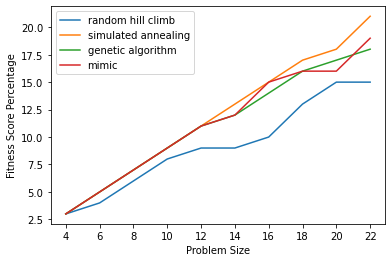

In [22]:
plt.plot(range(4, 24, 2), score1, label='random hill climb')
plt.plot(range(4, 24, 2), score2, label='simulated annealing')
plt.plot(range(4, 24, 2), score3, label='genetic algorithm')
plt.plot(range(4, 24, 2), score4, label='mimic')
# plt.ylim([50, 100])
plt.xticks(range(4, 24, 2))
# plt.xlim([-5, 165])
plt.ylabel('Fitness Score Percentage')
plt.xlabel('Problem Size')
plt.legend()

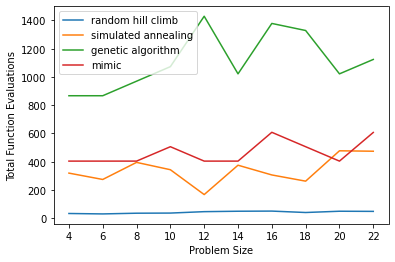

In [23]:
plt.plot(range(4, 24, 2), eval1, label='random hill climb')
plt.plot(range(4, 24, 2), eval2, label='simulated annealing')
plt.plot(range(4, 24, 2), eval3, label='genetic algorithm')
plt.plot(range(4, 24, 2), eval4, label='mimic')
plt.xticks(range(4, 24, 2))
# plt.xlim([-5, 165])
plt.ylabel('Total Function Evaluations')
plt.xlabel('Problem Size')
plt.legend()

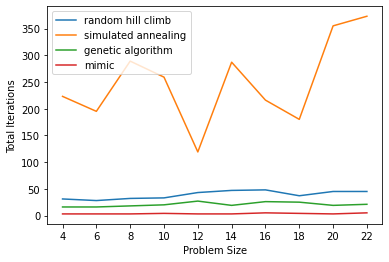

In [24]:
plt.plot(range(4, 24, 2), itera1, label='random hill climb')
plt.plot(range(4, 24, 2), itera2, label='simulated annealing')
plt.plot(range(4, 24, 2), itera3, label='genetic algorithm')
plt.plot(range(4, 24, 2), itera4, label='mimic')
plt.xticks(range(4, 24, 2))
# plt.xlim([-5, 165])
plt.ylabel('Total Iterations')
plt.xlabel('Problem Size')
plt.legend()

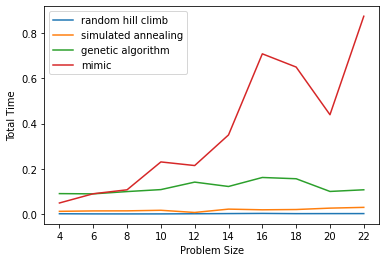

In [25]:
plt.plot(range(4, 24, 2), times1, label='random hill climb')
plt.plot(range(4, 24, 2), times2, label='simulated annealing')
plt.plot(range(4, 24, 2), times3, label='genetic algorithm')
plt.plot(range(4, 24, 2), times4, label='mimic')
plt.xticks(range(4, 24, 2))
# plt.xlim([-5, 165])
plt.ylabel('Total Time')
plt.xlabel('Problem Size')
plt.legend()